# Disnet
This notebook contains the code for disnet

In [2]:
# import packages
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Activation, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

# # train and validation data from cityscapes
val_data = open('val_data4disnet.pkl', 'rb')
test_data = open('test_data4disnet.pkl', 'rb')
train_data= open('train_data4disnet.pkl', 'rb')


test_data = pickle.load(test_data)
val_data = pickle.load(val_data)
train_data = pickle.load(train_data)

#shuffle the data
train_data = train_data.sample(frac=1).reset_index(drop=True)
#test_data = test_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)


In [3]:
#data on low quality and high quality

low_data = open('low_data4disnet.pkl', 'rb')
medium_data= open('medium_data4disnet.pkl', 'rb')


low_data = pickle.load(low_data)
medium_data = pickle.load(medium_data)

### Input vector

The model expects a vector for each object. [Bw, Bh, Bd, Cw, Ch, Cd]

Bw = 1/ width of bounding box \
Bh = 1/ height of bounding box \
Bd = 1/ diagonal of bounding box \
Cw = True object width in cm \
Ch = True object height in cm \
Cd = True object depth in cm  \

if your bounding box size is in pixels, you will need to take the normalized width,
so Bw = 1/ (bbox width / image width)

In [4]:
### create the train and validation data

#this functions transforms the vector column in the dataframe to a float
def vectorize(emptylist, data):
    'transforms dataframe string to float'

    values = emptylist
    for vector in data.vectors:
        #dd = vector[1:-1].split()
        
        dd= vector.tolist()

        #flt = [float(i) for i in list(dd)]

        #emptylist.append(flt)
        emptylist.append(dd)
        
    return emptylist

#train values
xtrain_values = []
xtrain_values = vectorize(xtrain_values, train_data)
                                        
X_train = np.array(xtrain_values)
y_train = np.array(train_data['y_true'].transform(func=lambda x: np.round(x,2)))

#validation values
xval_values = []
xval_values = vectorize(xval_values, val_data)

X_val = np.array(xval_values)
y_val = np.array(val_data['y_true'].transform(func=lambda x: np.round(x,2)))

#test values
xtest_values = []
xtest_values = vectorize(xtest_values, test_data)

X_test = np.array(xtest_values)
y_test = np.array(test_data['y_true'].transform(func=lambda x: np.round(x,2)))

### Building the model

In [6]:
#the disnet model

model = Sequential()
model.add(InputLayer(input_shape=(6,))) #input is a 6 dimensional vector
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(100, activation="selu"))
model.add(Dense(1, activation="selu"))

optimizer = Adam(1e-4)

model.compile(optimizer=optimizer,
              loss="mean_squared_error", metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)              

In [7]:
# Training

current_dir = os.getcwd()
disnet_checkpoints = os.path.join(current_dir, "best_disnet_model.keras")

callbacks = [EarlyStopping(monitor='val_loss', patience=50, verbose=False),
                 ModelCheckpoint(filepath=disnet_checkpoints, save_best_only=True)]

history = model.fit(x=X_train,
         y=y_train,
          callbacks=callbacks,
         epochs=1000,
         batch_size=50,
          verbose = 2,
         validation_data=(X_val,y_val))

Train on 21079 samples, validate on 7143 samples
Epoch 1/1000
21079/21079 - 2s - loss: 111.4338 - mean_squared_error: 111.4338 - val_loss: 57.3671 - val_mean_squared_error: 57.3671
Epoch 2/1000
21079/21079 - 1s - loss: 57.6236 - mean_squared_error: 57.6236 - val_loss: 53.7858 - val_mean_squared_error: 53.7858
Epoch 3/1000
21079/21079 - 1s - loss: 55.8307 - mean_squared_error: 55.8307 - val_loss: 52.1690 - val_mean_squared_error: 52.1690
Epoch 4/1000
21079/21079 - 1s - loss: 54.2653 - mean_squared_error: 54.2653 - val_loss: 54.0091 - val_mean_squared_error: 54.0092
Epoch 5/1000
21079/21079 - 1s - loss: 53.8169 - mean_squared_error: 53.8169 - val_loss: 53.7005 - val_mean_squared_error: 53.7005
Epoch 6/1000
21079/21079 - 1s - loss: 53.5540 - mean_squared_error: 53.5540 - val_loss: 61.4036 - val_mean_squared_error: 61.4036
Epoch 7/1000
21079/21079 - 1s - loss: 52.9304 - mean_squared_error: 52.9304 - val_loss: 52.5220 - val_mean_squared_error: 52.5220
Epoch 8/1000
21079/21079 - 1s - loss: 5

Epoch 64/1000
21079/21079 - 1s - loss: 48.5310 - mean_squared_error: 48.5310 - val_loss: 53.3826 - val_mean_squared_error: 53.3826
Epoch 65/1000
21079/21079 - 1s - loss: 48.6335 - mean_squared_error: 48.6335 - val_loss: 52.4368 - val_mean_squared_error: 52.4368
Epoch 66/1000
21079/21079 - 1s - loss: 48.3721 - mean_squared_error: 48.3721 - val_loss: 62.1894 - val_mean_squared_error: 62.1893
Epoch 67/1000
21079/21079 - 1s - loss: 48.2895 - mean_squared_error: 48.2895 - val_loss: 52.9728 - val_mean_squared_error: 52.9728
Epoch 68/1000
21079/21079 - 1s - loss: 48.2288 - mean_squared_error: 48.2289 - val_loss: 52.7928 - val_mean_squared_error: 52.7928
Epoch 69/1000
21079/21079 - 1s - loss: 48.1953 - mean_squared_error: 48.1953 - val_loss: 52.1210 - val_mean_squared_error: 52.1210


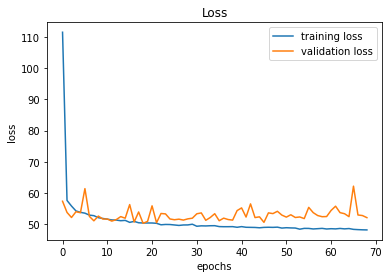

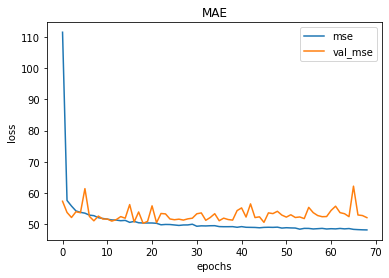

In [9]:
## visualize training
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['mean_squared_error'], label='mse')
plt.plot(history.history['val_mean_squared_error'], label='val_mse')
plt.title('MAE')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:

#evaluate the data
model=keras.models.load_model('best_disnet_model.keras')

predictions = model.predict(x=X_test, batch_size=50)

MAE(y_test,predictions)

5.749800185300625

In [38]:
#save the data
test_data['y_pred'] = predictions

test_data.to_json('disnet_high_predictions.json')
test_data.head()

,filename,object_id,y_true,vectors,o_width,o_height,shape,bbox,y_pred
0,bonn_000000_000000,0,37.599998,"[81.92020971573686, 40.95993708553664, 36.6357...",25,25,[2],"[1135, 1160, 351, 376]",50.387180
1,bonn_000000_000001,0,36.750000,"[78.76930832670358, 39.38465416335179, 35.2267...",25,26,[2],"[1139, 1164, 349, 375]",50.817570
3,bonn_000000_000002,0,35.639999,"[75.85181589247246, 39.38465416335179, 34.9537...",27,26,[2],"[1142, 1169, 347, 373]",50.751572
5,bonn_000000_000003,0,34.750000,"[70.62047146226749, 35.31036041284874, 31.5825...",29,29,[2],"[1151, 1180, 337, 366]",50.268085
6,bonn_000000_000004,0,34.259998,"[70.62047146226749, 36.57136169808147, 32.4751...",29,28,[2],"[1156, 1185, 330, 358]",51.349361
